In [1]:
import tiktoken
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
SEP = "\n----------------------------------------------------------------------------------------\n"

In [3]:
with open("strings.txt") as f:
    strings = f.read()

In [4]:
strings = map(lambda x: x.strip("f").strip("\"'").strip(), strings.split(SEP))
strings = list(set(list(strings)))
print(len(strings))

8473


In [5]:
enc = tiktoken.encoding_for_model("gpt-3.5-turbo")

In [23]:
freq = defaultdict(int)

In [24]:
for prompt in strings:
    tokens = enc.encode(prompt, disallowed_special=())
    for token in tokens:
        if freq.get(str(token)) is not None:
            freq[str(token)] += 1
        else:
            freq[str(token)] = 1

In [25]:
freq = {
    k: v
    for k, v in sorted(freq.items(), key=lambda item: item[1], reverse=True)
}

In [13]:
freq

{'279': 15763,
 '11': 10667,
 '13': 9787,
 '264': 7133,
 '311': 6870,
 '25': 6468,
 '323': 5814,
 '315': 4965,
 '220': 4614,
 '314': 4143}

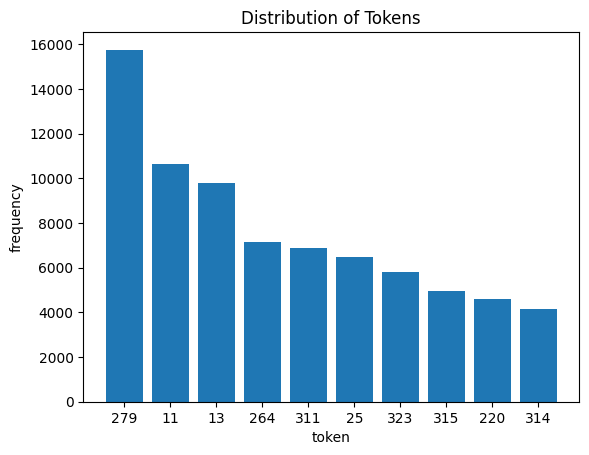

In [14]:
tokens = freq.keys()
counts = freq.values()

plt.xlabel("token")
plt.ylabel("frequency")
plt.title("Distribution of Tokens")
plt.bar(tokens, counts)
plt.show()

In [15]:
for token in freq.keys():
    print(f"\"{enc.decode([int(token)])}\"")
    print("*" * 10)
    

" the"
**********
","
**********
"."
**********
" a"
**********
" to"
**********
":"
**********
" and"
**********
" of"
**********
" "
**********
" {"
**********


In [27]:
frequencies = freq.values()
ranks = range(1, len(frequencies) + 1)

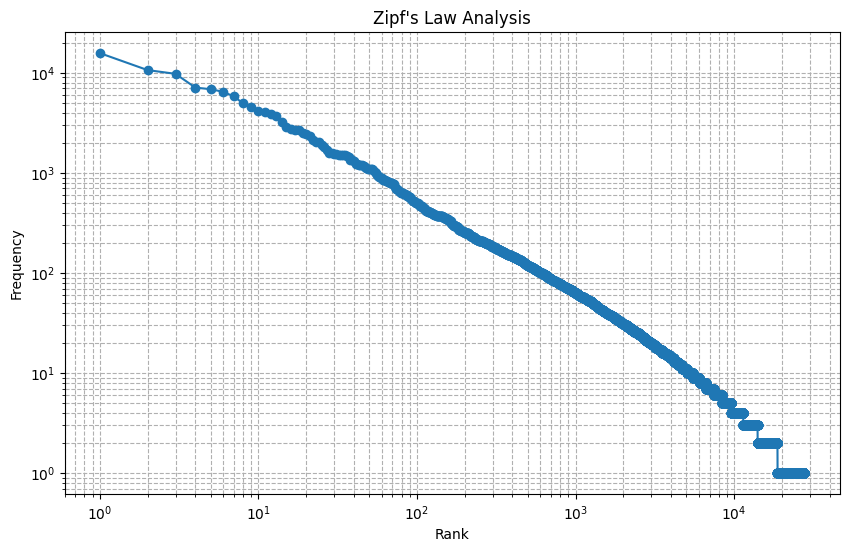

In [28]:
plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, marker='o')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Zipf\'s Law Analysis')
plt.grid(True, which="both", ls="--")

In [30]:
max_tok_id = max([int(tok) for tok in freq.keys()])
max_tok_id

100243

In [31]:
token_ids = [str(x) for x in range(1,max_tok_id)]
token_ids

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '13

In [53]:
freqs = [freq[tok_id] if freq.get(tok_id) is not None else 0 for tok_id in token_ids]

In [ ]:
plt.bar(token_ids, freqs)
plt.title("Distribution of All Tokens")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("token")
plt.ylabel("frequency")
plt.show()